<img src="./../Imagenes/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Laboratorio N°1 - Notebook de presentacion simulacion numerica
#### Tomas A. Albanesi

In [6]:
# Importacion de librerias
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import matplotlib as mpl
from pytc2.sistemas_lineales import pzmap, bodePlot, tf2sos_analog, analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from IPython.display import display, Markdown
from pytc2.general import print_subtitle

In [7]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

Epsilon^2 ee = 0.258925
nn 1 - alfa_min_cheby 6.810739
nn 2 - alfa_min_cheby 23.199906
nn 3 - alfa_min_cheby 40.709389
nn 4 - alfa_min_cheby 58.241589
Seleccionamos el orden nn 2


#### Transferencia Pasa Bajos prototipo

<IPython.core.display.Math object>

#### Transferencia Pasa Bajos prototipo factorizada en $w_0$ y $Q$

<IPython.core.display.Math object>

#### Transferencia Pasa Altos

<IPython.core.display.Math object>

#### Transferencia Pasa Altos factorizada en $w_0$ y $Q$

<IPython.core.display.Math object>

#### Grafico de pasa altos solicitado

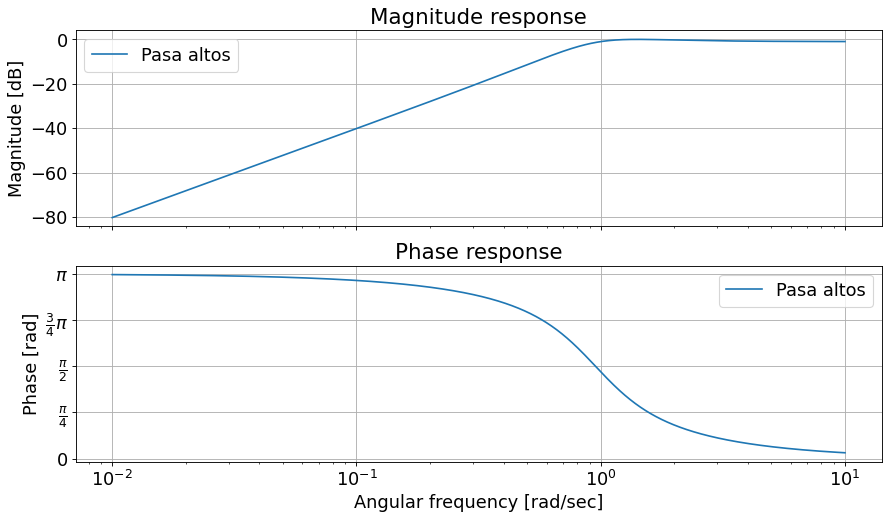

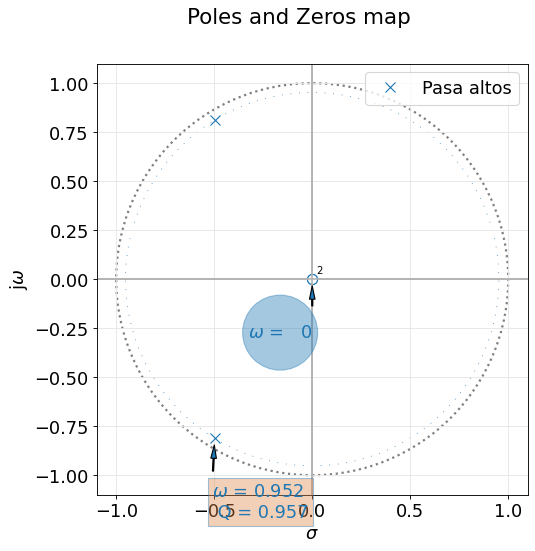

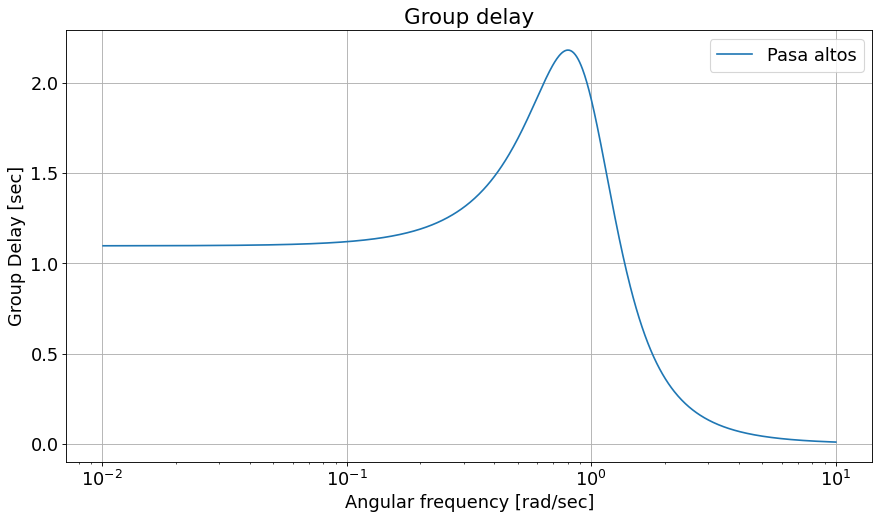

In [14]:
plt.close("all")

### DATOS DE PLANTILLA (parametros a modificar)

# Definicion de atenuacion maxima en db
alfa_max = 1
# Definicion de atenuacion minima en db
alfa_min = 20
# Definicion de frecuencia angular de banda de stop normalizada
ws = 3.83
# Definicion de frecuencia angular de banda de paso normalizada
wp = 1

# Calculo de Epsilon Cuadrado, idem para maxima planicidad y Cheby
ee = 10**(alfa_max/10)-1
print( 'Epsilon^2 ee = {:f}'.format(ee))

# Itero para calcular el n del filtro
veces = 0
for nn in range(1,5):
    
    # Calculo de atenuacion minima en db para chebyshev 
    alfa_min_n = 10*np.log10(1 + ee * np.cosh(nn * np.arccosh(ws))**2 )
    
    # Muestro los resultados
    print( 'nn {:d} - alfa_min_cheby {:f}'.format(nn, alfa_min_n) )
    
    if (alfa_min_n > alfa_min and veces == 0):
        
        n_seleccionado = nn
        veces = veces + 1
        
print('Seleccionamos el orden nn {:d}'.format(n_seleccionado))

# Definicion de Chebyshev pasa altos prototipo
numlp, denlp = sig.cheby1(n_seleccionado, alfa_max, wp, analog=True)

# Creacion de la funcion transferencia pasa bajos prototipo
tf_lp = sig.TransferFunction(numlp, denlp)

tf_lp_analog = tf2sos_analog(numlp, denlp)

# Conversion de pasa bajos a pasa altos
numhp, denhp = sig.lp2hp(numlp, denlp, wp)

# Creacion de la funcion transferencia pasa altos
tf_hp = sig.TransferFunction(numhp, denhp)

tf_hp_analog = tf2sos_analog(numhp, denhp)

print_subtitle('Transferencia Pasa Bajos prototipo')

pretty_print_SOS(tf_lp_analog)

print_subtitle('Transferencia Pasa Bajos prototipo factorizada en $w_0$ y $Q$')

pretty_print_SOS(tf_lp_analog, mode='omegayq')

print_subtitle('Transferencia Pasa Altos')

pretty_print_SOS(tf_hp_analog)

print_subtitle('Transferencia Pasa Altos factorizada en $w_0$ y $Q$')

pretty_print_SOS(tf_hp_analog, mode='omegayq')

# Graficos

print_subtitle('Grafico de pasa altos solicitado')
analyze_sys([tf_hp], ['Pasa altos'])